In [1]:
import torch
from torch import nn,optim
from mltools import ld,draw,models

In [2]:
vocab,train_iter,val_iter,test_iter=ld.chn_senti_corp('./data/ChnSentiCorp_htl_all.csv') # 加载词表，数据集
rnn_layer=nn.LSTM(len(vocab), hidden_size=512, batch_first=True, bidirectional=True) # 定义循环网络LSTM
model=models.RNNModel(rnn_layer, vocab_size=len(vocab), step_size=200, output_size=2) # 定义训练模型
device=torch.device('cuda')

Epoch 0, Training loss 0.5821688771247864, Validation loss 1.394728422164917
Epoch 1, Training loss 0.9256342649459839, Validation loss 1.0720897912979126
Epoch 2, Training loss 0.5911846160888672, Validation loss 1.106614112854004
Epoch 3, Training loss 0.5375001430511475, Validation loss 1.2678810358047485
Epoch 4, Training loss 0.4625173807144165, Validation loss 0.6843377947807312
Epoch 5, Training loss 1.352073073387146, Validation loss 0.536706268787384
Epoch 6, Training loss 2.085752010345459, Validation loss 0.9106378555297852
Epoch 7, Training loss 0.35096222162246704, Validation loss 0.9915696978569031
Epoch 8, Training loss 0.535259485244751, Validation loss 2.488199472427368
Epoch 9, Training loss 0.6214165687561035, Validation loss 2.0017478466033936


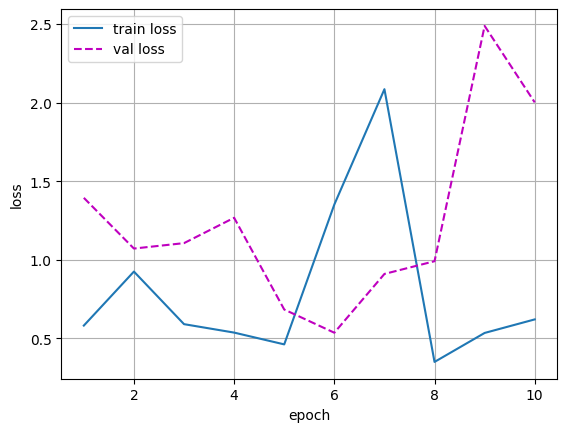

In [3]:
# 训练
def train(model, train_iter, val_iter, vocab, *, num_epochs, learning_rate, device):
    model.to(device) # 将网络复制到device上
    loss = nn.CrossEntropyLoss() # 定义损失函数
    optimizer = torch.optim.SGD(model.parameters(), learning_rate) # 定义优化器
    animator=draw.Animator(line_num=2,xlabel='epoch',ylabel='loss',xlim=[0, num_epochs+1],ylim=-0.1,legend=['train loss','val loss'])
    for epoch in range(num_epochs):
        # 计算训练集
        for x, y in train_iter:
            # 运算
            x, y = x.to(device), y.to(device)
            y_train, _ = model(x)
            train_loss = loss(y_train, y)
            # 梯度更新
            optimizer.zero_grad()
            train_loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1, norm_type=2)
            optimizer.step()
        # 计算验证集
        with torch.no_grad():
            for x, y in val_iter:
                # 运算
                x, y = x.to(device), y.to(device)
                y_val, _ = model(x)
                val_loss = loss(y_val, y)
        animator.add(train_loss.detach().cpu(),val_loss.detach().cpu()) # 添加损失值
train(model,train_iter,val_iter,vocab,num_epochs=10,learning_rate=1,device=device)

In [4]:
# 测试模型
def test(model,test_iter,device):
    model.to(device) # 将网络复制到device上
    test_num,real_num=0,0 # 定义测试数量和预测真实数量
    # 测试
    for x,y in test_iter:
        x,y=x.to(device),y.to(device)
        y_test, _ = model(x)
        y_test=y_test.argmax(dim=1)
        pred=y==y_test
        test_num+=len(pred)
        real_num+=pred.sum()
    print(f'Accuracy rate {real_num/test_num}') # 计算测试准确率并输出
test(model,test_iter,device)

Accuracy rate 0.3216123580932617


In [5]:
# 预测模型
def predict(model, test_iter, device):
    model.to(device) # 将网络复制到device上
    # 从测试中取一个批量
    x, y = next(iter(test_iter))
    x, y = x[:10].to(device), y[:10].to(device)
    values = [''.join(item) for item in vocab[x.tolist()]]
    # 预测
    y_pred, _ = model(x)
    y_pred = y_pred.argmax(dim=1)
    for pred, true, value in zip(y_pred, y, values):
        print(f'预测值 {pred}, 真实值 {true}, 数据 {value}')
predict(model, test_iter, device)

预测值 0, 真实值 1, 数据 这个酒店是当地最好的了，就是这样一个中小城市酒店价格不便宜，三种价格的房间其实区别不大，最便宜的就是没有地毯，木板的，最贵的只是送了两包咖啡，晚上偶尔有送花，所以自己来玩的可以住最便宜的。这个城市也就是这个酒店了。<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
预测值 0, 真实值 0, 数据 像是仓库改的拖鞋不错卫生间还可以早餐很差<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pa